In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

In [4]:
attr_auc_time =[]
attr_nll_time = []
edge_auc_time = []
edge_nll_time = []
   
for skiptime in range(1,6):
    attr_auc = []
    attr_nll = []
    edge_auc = []
    edge_nll = []

    for i in range(32):

        path = "/Users/matsumoto-hirotomo/coma/experiment_data/NIPS/200_20/incomplete/t={}/".format(skiptime)
        attr_auc_path = path+"drop={}/persona=5/proposed_attr_auc.npy".format(i)
        attr_nll_path = path+"drop={}/persona=5/proposed_attr_nll.npy".format(i)
        edge_auc_path = path+"drop={}/persona=5/proposed_edge_auc.npy".format(i)
        edge_nll_path = path+"drop={}/persona=5/proposed_edge_nll.npy".format(i)

        attr_auc.append(np.load(attr_auc_path))
        attr_nll.append(np.load(attr_nll_path))
        edge_auc.append(np.load(edge_auc_path))
        edge_nll.append(np.load(edge_nll_path))


    #attr_auc_time.append()
    #attr_nll_time = []
    #edge_auc_time = []
    #edge_nll_time = []
    #ある時刻での欠損の位置を変えた時のそれぞれの値
    time_attr_auc = np.mean(attr_auc,axis=1)
    time_edge_auc = np.mean(edge_auc,axis=1)
    time_attr_nll = np.mean(attr_nll,axis=1)
    time_edge_nll = np.mean(edge_nll,axis=1)

    #auc
    attr_auc_mean = np.mean(time_attr_auc,axis=0)
    attr_auc_max = np.max(time_attr_auc,axis=0)
    attr_auc_min = np.min(time_attr_auc,axis=0)
    edge_auc_mean = np.mean(time_edge_auc,axis=0)
    edge_auc_max = np.max(time_edge_auc,axis=0)
    edge_auc_min = np.min(time_edge_auc,axis=0)

    attr_auc_time.append([attr_auc_mean,attr_auc_min,attr_auc_max])
    edge_auc_time.append([edge_auc_mean,edge_auc_min,edge_auc_max])

    #nll
    attr_nll_mean = np.mean(time_attr_nll,axis=0)
    attr_nll_max = np.max(time_attr_nll,axis=0)
    attr_nll_min = np.min(time_attr_nll,axis=0)
    edge_nll_mean = np.mean(time_edge_nll,axis=0)
    edge_nll_max = np.max(time_edge_nll,axis=0)
    edge_nll_min = np.min(time_edge_nll,axis=0)

    attr_nll_time.append([attr_nll_mean,attr_nll_min,attr_nll_max])
    edge_nll_time.append([edge_nll_mean,edge_nll_min,edge_nll_max])




Text(0, 0.5, 'accuracy')

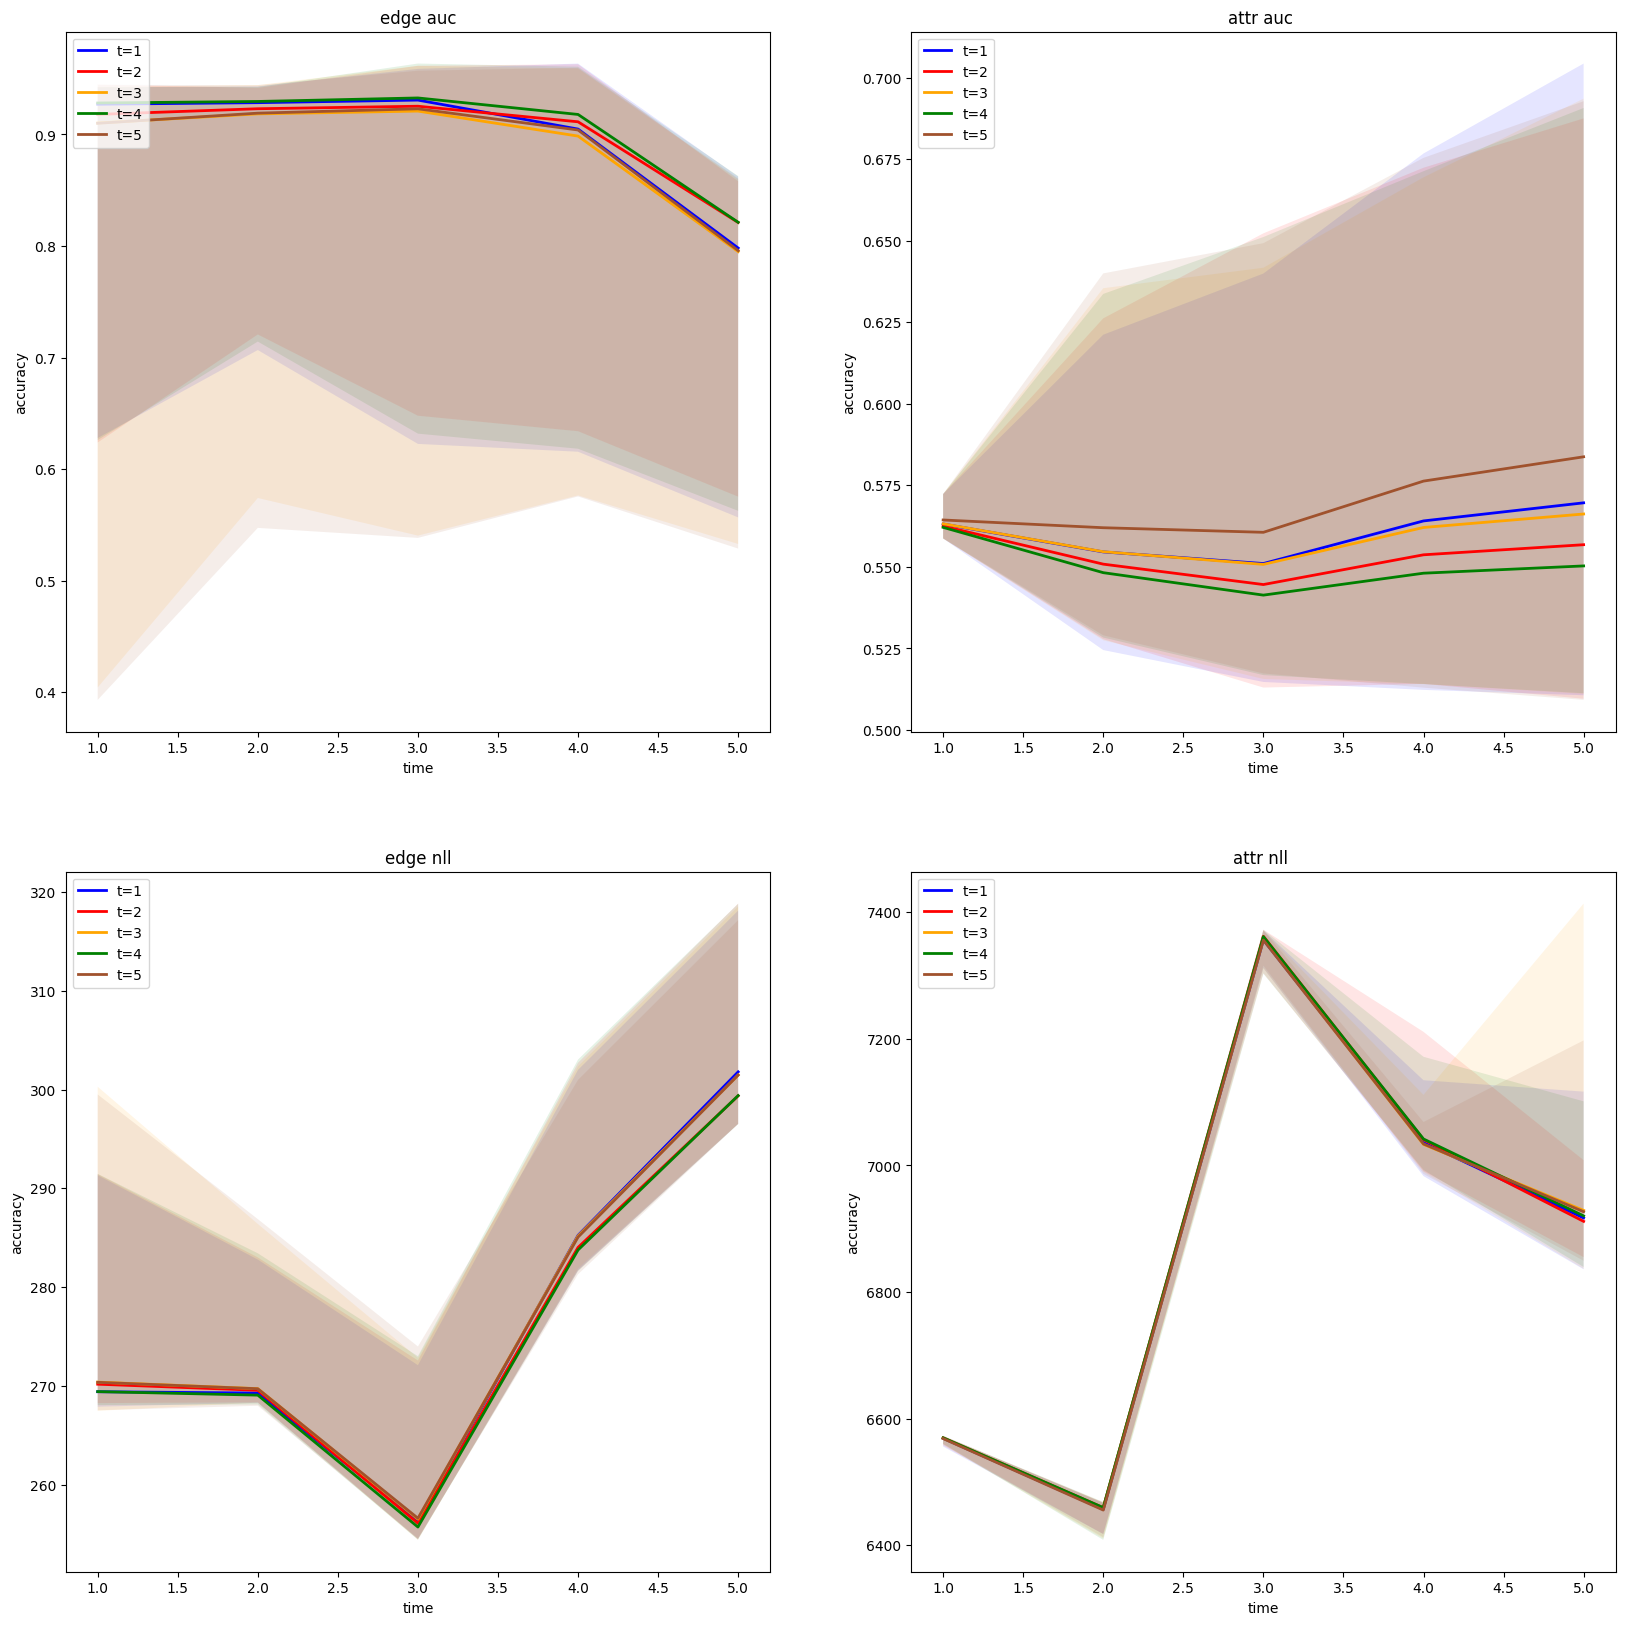

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))


t = [1,2,3,4,5]


#edge auc
#平均
axes[0,0].plot(t, edge_auc_time[0][0], lw=2, label='t=1', color='blue')
axes[0,0].plot(t, edge_auc_time[1][0], lw=2, label='t=2', color='red')
axes[0,0].plot(t, edge_auc_time[2][0], lw=2, label='t=3', color='orange')
axes[0,0].plot(t, edge_auc_time[3][0], lw=2, label='t=4', color='green')
axes[0,0].plot(t, edge_auc_time[4][0], lw=2, label='t=5', color='sienna')
#axes[0,0].plot(t, edge_auc_time[i][0], lw=2, label='t=5', color='teal')
#領域
axes[0,0].fill_between(t, edge_auc_time[0][1], edge_auc_time[0][2], facecolor='blue', alpha=0.1)
axes[0,0].fill_between(t, edge_auc_time[1][1], edge_auc_time[1][2], facecolor='red', alpha=0.1)
axes[0,0].fill_between(t, edge_auc_time[2][1], edge_auc_time[2][2], facecolor='orange', alpha=0.1)
axes[0,0].fill_between(t, edge_auc_time[3][1], edge_auc_time[3][2], facecolor='green', alpha=0.1)
axes[0,0].fill_between(t, edge_auc_time[4][1], edge_auc_time[4][2], facecolor='sienna', alpha=0.1)
#axes[0,0].fill_between(t, edge_auc_time[i][1], edge_auc_time[i][2], facecolor='teal', alpha=0.1)
#キャプション
axes[0,0].set_title(r'edge auc')
axes[0,0].legend(loc='upper left')
axes[0,0].set_xlabel('time')
axes[0,0].set_ylabel('accuracy')



#attr auc
#平均
axes[0,1].plot(t, attr_auc_time[0][0], lw=2, label='t=1', color='blue')
axes[0,1].plot(t, attr_auc_time[1][0], lw=2, label='t=2', color='red')
axes[0,1].plot(t, attr_auc_time[2][0], lw=2, label='t=3', color='orange')
axes[0,1].plot(t, attr_auc_time[3][0], lw=2, label='t=4', color='green')
axes[0,1].plot(t, attr_auc_time[4][0], lw=2, label='t=5', color='sienna')
#axes[0,1].plot(t, attr_auc_time[i][0], lw=2, label='t=5', color='teal')
#領域
axes[0,1].fill_between(t, attr_auc_time[0][1], attr_auc_time[0][2], facecolor='blue', alpha=0.1)
axes[0,1].fill_between(t, attr_auc_time[1][1], attr_auc_time[1][2], facecolor='red', alpha=0.1)
axes[0,1].fill_between(t, attr_auc_time[2][1], attr_auc_time[2][2], facecolor='orange', alpha=0.1)
axes[0,1].fill_between(t, attr_auc_time[3][1], attr_auc_time[3][2], facecolor='green', alpha=0.1)
axes[0,1].fill_between(t, attr_auc_time[4][1], attr_auc_time[4][2], facecolor='sienna', alpha=0.1)
#axes[0,1].fill_between(t, attr_auc_time[i][1], attr_auc_time[i][2], facecolor='teal', alpha=0.1)
#キャプション
axes[0,1].set_title(r'attr auc ')
axes[0,1].legend(loc='upper left')
axes[0,1].set_xlabel('time')
axes[0,1].set_ylabel('accuracy')

#edge nll
#平均
axes[1,0].plot(t, edge_nll_time[0][0], lw=2, label='t=1', color='blue')
axes[1,0].plot(t, edge_nll_time[1][0], lw=2, label='t=2', color='red')
axes[1,0].plot(t, edge_nll_time[2][0], lw=2, label='t=3', color='orange')
axes[1,0].plot(t, edge_nll_time[3][0], lw=2, label='t=4', color='green')
axes[1,0].plot(t, edge_nll_time[4][0], lw=2, label='t=5', color='sienna')
#axes[1,0].plot(t, edge_nll_time[i][0], lw=2, label='t=5', color='teal')
#領域
axes[1,0].fill_between(t, edge_nll_time[0][1], edge_nll_time[0][2], facecolor='blue', alpha=0.1)
axes[1,0].fill_between(t, edge_nll_time[1][1], edge_nll_time[1][2], facecolor='red', alpha=0.1)
axes[1,0].fill_between(t, edge_nll_time[2][1], edge_nll_time[2][2], facecolor='orange', alpha=0.1)
axes[1,0].fill_between(t, edge_nll_time[3][1], edge_nll_time[3][2], facecolor='green', alpha=0.1)
axes[1,0].fill_between(t, edge_nll_time[4][1], edge_nll_time[4][2], facecolor='sienna', alpha=0.1)
#axes[1,0].fill_between(t, edge_nll_time[i][1], edge_nll_time[i][2], facecolor='teal', alpha=0.1)
#キャプション
axes[1,0].set_title(r'edge nll')
axes[1,0].legend(loc='upper left')
axes[1,0].set_xlabel('time')
axes[1,0].set_ylabel('accuracy')

#attr nll
#平均
axes[1,1].plot(t, attr_nll_time[0][0], lw=2, label='t=1', color='blue')
axes[1,1].plot(t, attr_nll_time[1][0], lw=2, label='t=2', color='red')
axes[1,1].plot(t, attr_nll_time[2][0], lw=2, label='t=3', color='orange')
axes[1,1].plot(t, attr_nll_time[3][0], lw=2, label='t=4', color='green')
axes[1,1].plot(t, attr_nll_time[4][0], lw=2, label='t=5', color='sienna')
#axes[1,1].plot(t, attr_nll_time[i][0], lw=2, label='t=5', color='teal')
#領域
axes[1,1].fill_between(t, attr_nll_time[0][1], attr_nll_time[0][2], facecolor='blue', alpha=0.1)
axes[1,1].fill_between(t, attr_nll_time[1][1], attr_nll_time[1][2], facecolor='red', alpha=0.1)
axes[1,1].fill_between(t, attr_nll_time[2][1], attr_nll_time[2][2], facecolor='orange', alpha=0.1)
axes[1,1].fill_between(t, attr_nll_time[3][1], attr_nll_time[3][2], facecolor='green', alpha=0.1)
axes[1,1].fill_between(t, attr_nll_time[4][1], attr_nll_time[4][2], facecolor='sienna', alpha=0.1)
#axes[1,1].fill_between(t, attr_nll_time[i][1], attr_nll_time[i][2], facecolor='teal', alpha=0.1)
#キャプション
axes[1,1].set_title(r'attr nll ')
axes[1,1].legend(loc='upper left')
axes[1,1].set_xlabel('time')
axes[1,1].set_ylabel('accuracy')